In [27]:
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.metrics import davies_bouldin_score,adjusted_rand_score,rand_score
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from scipy.stats import norm

In [28]:
data = pd.read_csv('mcdonalds.csv')
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [29]:
data.shape

(1453, 15)

In [30]:
x = data.iloc[:,0:11]


In [31]:
LE = LabelEncoder()
x = x.apply(LE.fit_transform)
x.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


In [32]:
X = x.to_numpy()


# Standardisation

In [33]:
scaler = StandardScaler()
x_standard = scaler.fit_transform(x)
x_standard.shape

(1453, 11)

# PCA

In [34]:
pca = PCA(n_components=11)
x_pca = pca.fit_transform(x)
new_col = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
x_pca_pd = pd.DataFrame(data = x_pca, columns = new_col)

In [35]:
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = x.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variable,,,,,,,,,,,
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069


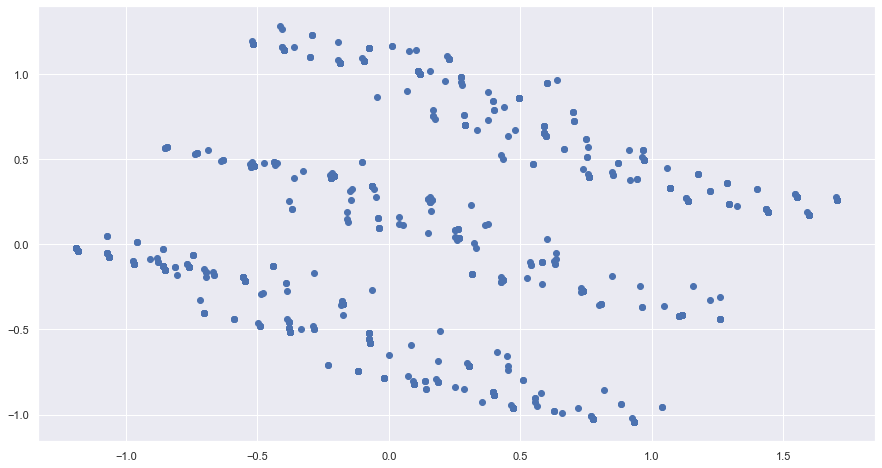

In [36]:
plt.scatter(x_pca[:,0],x_pca[:,1])

# Biplot

In [37]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

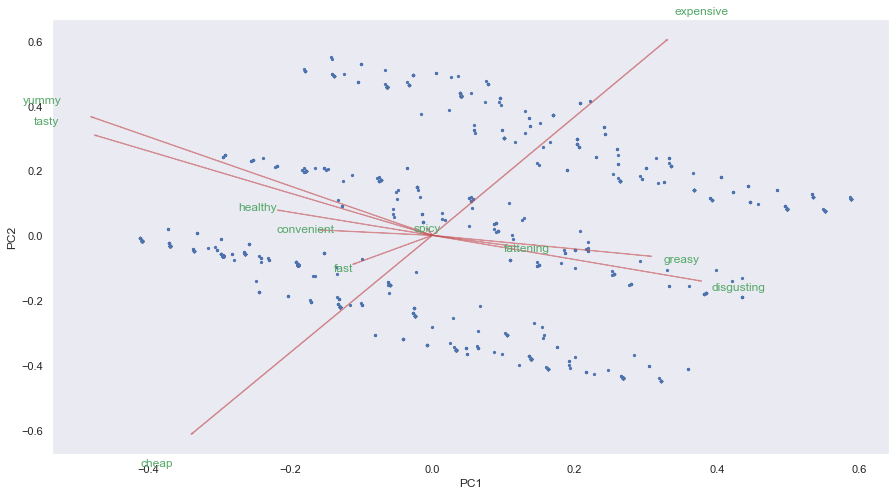

In [38]:
myplot(x_pca[:,0:2],np.transpose(loadings[0:2, :]),list(x.columns))
plt.show()

# Elbow Method

In [39]:
def elbow(x):
    wcss=[]
    for i in range(1,10):
        kmeans = KMeans(i)
        kmeans.fit(x)
        wcss_iter = kmeans.inertia_
        wcss.append(wcss_iter)

    number_clusters = range(1,10)
    plt.plot(number_clusters,wcss)
    plt.title('The Elbow title')
   
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')

    plt.bar(number_clusters,wcss)
    plt.xlabel('no of segments')
    plt.ylabel('sum of within cluster distances')

In [40]:
def elbow_bar(x):
    wcss=[]
    for i in range(1,10):
        kmeans = KMeans(i)
        kmeans.fit(x)
        wcss_iter = kmeans.inertia_
        wcss.append(wcss_iter)

    number_clusters = range(1,10)
    
    plt.bar(number_clusters,wcss)
    plt.xlabel('no of segments')
    plt.ylabel('sum of within cluster distances')

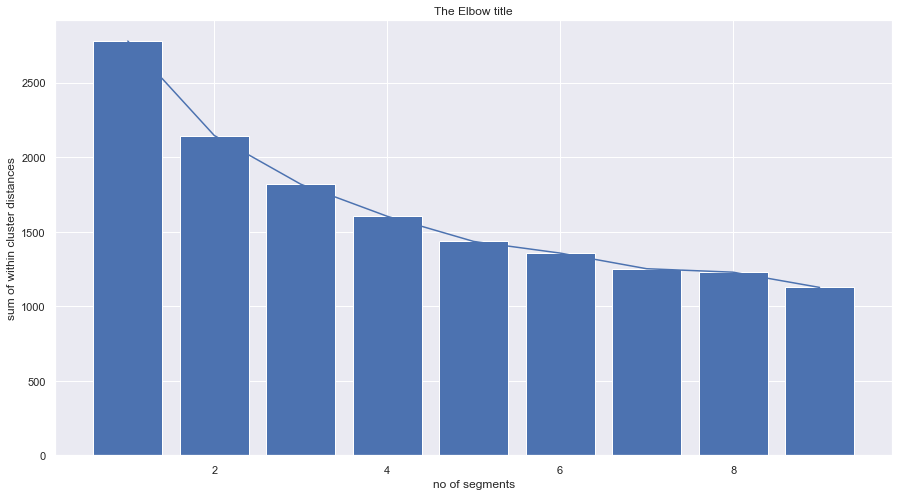

In [41]:
elbow(x_pca)

# Stability-based data structure analysis

In [44]:
segments = [[] for i in range(10)]
for k in range(2,10):
    # mean = 0
    for i in range(100):
        sample_1 = x_pca_pd.sample(n=1453,replace=True,random_state=100 + i)
        sample_2 = x_pca_pd.sample(n=1453,replace=True,random_state=i)
        KMeans_1 = KMeans(n_clusters=k,n_init = 10,verbose = 0,random_state=0).fit(sample_1)
        KMeans_2 = KMeans(n_clusters=k,n_init = 10,verbose = 0,random_state=0).fit(sample_2)
        l1 = KMeans_1.labels_
        l2 = KMeans_2.labels_
        segments[k].append(adjusted_rand_score(l1,l2))

nd_seg = np.array(segments,dtype=object)

Text(0, 0.5, 'ARI')

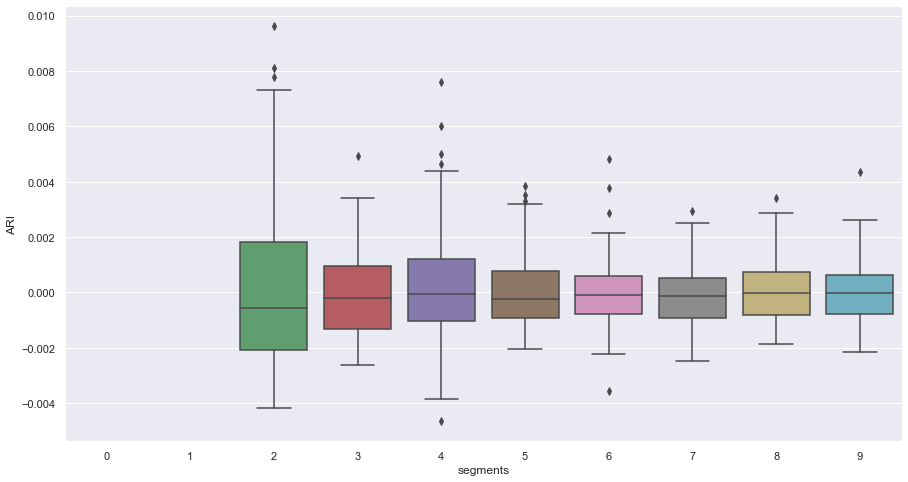

In [45]:

sns.boxplot(data = nd_seg)
plt.xlabel("segments")
plt.ylabel("ARI")

# Cluster

In [46]:
K_means = KMeans(n_clusters=4, n_init=10, verbose=0, random_state=0).fit(x_pca)

In [47]:
from collections import Counter
labels = K_means.labels_
counts = Counter(labels)
counts[0]

243

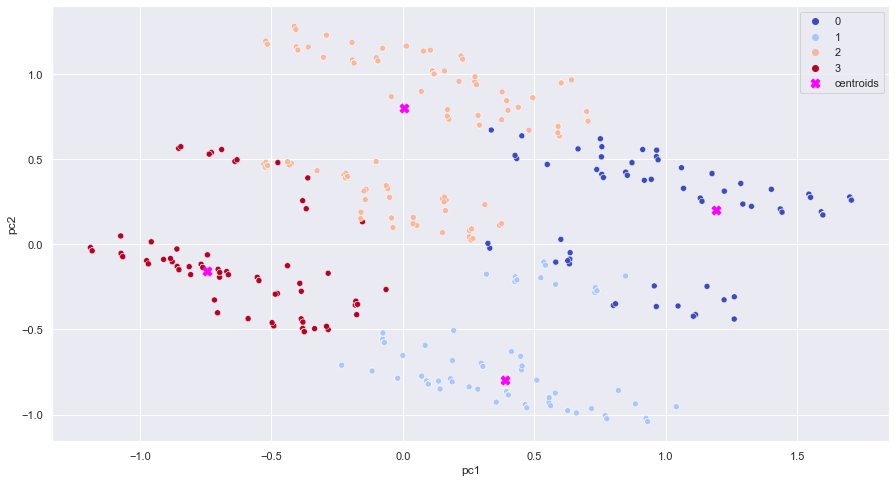

In [48]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(data=x_pca_pd, x="pc1", y="pc2", hue=K_means.labels_,palette = "coolwarm")
plt.scatter(K_means.cluster_centers_[:,0], K_means.cluster_centers_[:,1], 
            marker="X",color='magenta', s=80, label="centroids")
plt.legend(loc='upper right')
plt.show()

# SEGMENT PROFILING

In [49]:
cluster_0 = np.copy([X[1,:]])
cluster_1 = np.copy([X[1,:]])
cluster_2 = np.copy([X[1,:]])
cluster_3 = np.copy([X[1,:]])
# k = np.concatenate((cluster_0,[x_pca[1,:]]),axis = 0)
for i in range(len(labels)):
    if labels[i] == 0:
        cluster_0 = np.concatenate((cluster_0,[X[i,:]]),axis = 0)
    if labels[i] == 1:
        cluster_1 = np.concatenate((cluster_1,[X[i,:]]),axis = 0)
    if labels[i] == 2:
        cluster_2 = np.concatenate((cluster_2,[X[i,:]]),axis = 0)
    if labels[i] == 3:
        cluster_3 = np.concatenate((cluster_3,[X[i,:]]),axis = 0)
    
np.delete(cluster_0, 1, 0)
np.delete(cluster_1, 1, 0)
np.delete(cluster_2, 1, 0)
np.delete(cluster_3, 1, 0)
cluster_0_pd = pd.DataFrame(data = cluster_0,columns= loadings_df.index)
cluster_1_pd = pd.DataFrame(data = cluster_1,columns= loadings_df.index)
cluster_2_pd = pd.DataFrame(data = cluster_2,columns= loadings_df.index)
cluster_3_pd = pd.DataFrame(data = cluster_3,columns= loadings_df.index)


In [50]:
per =[]
for i in range(len(counts)):
    per.append(counts[i]/1453*100)
print(per)

[16.72401927047488, 21.197522367515482, 24.294562973158982, 37.78389538885065]


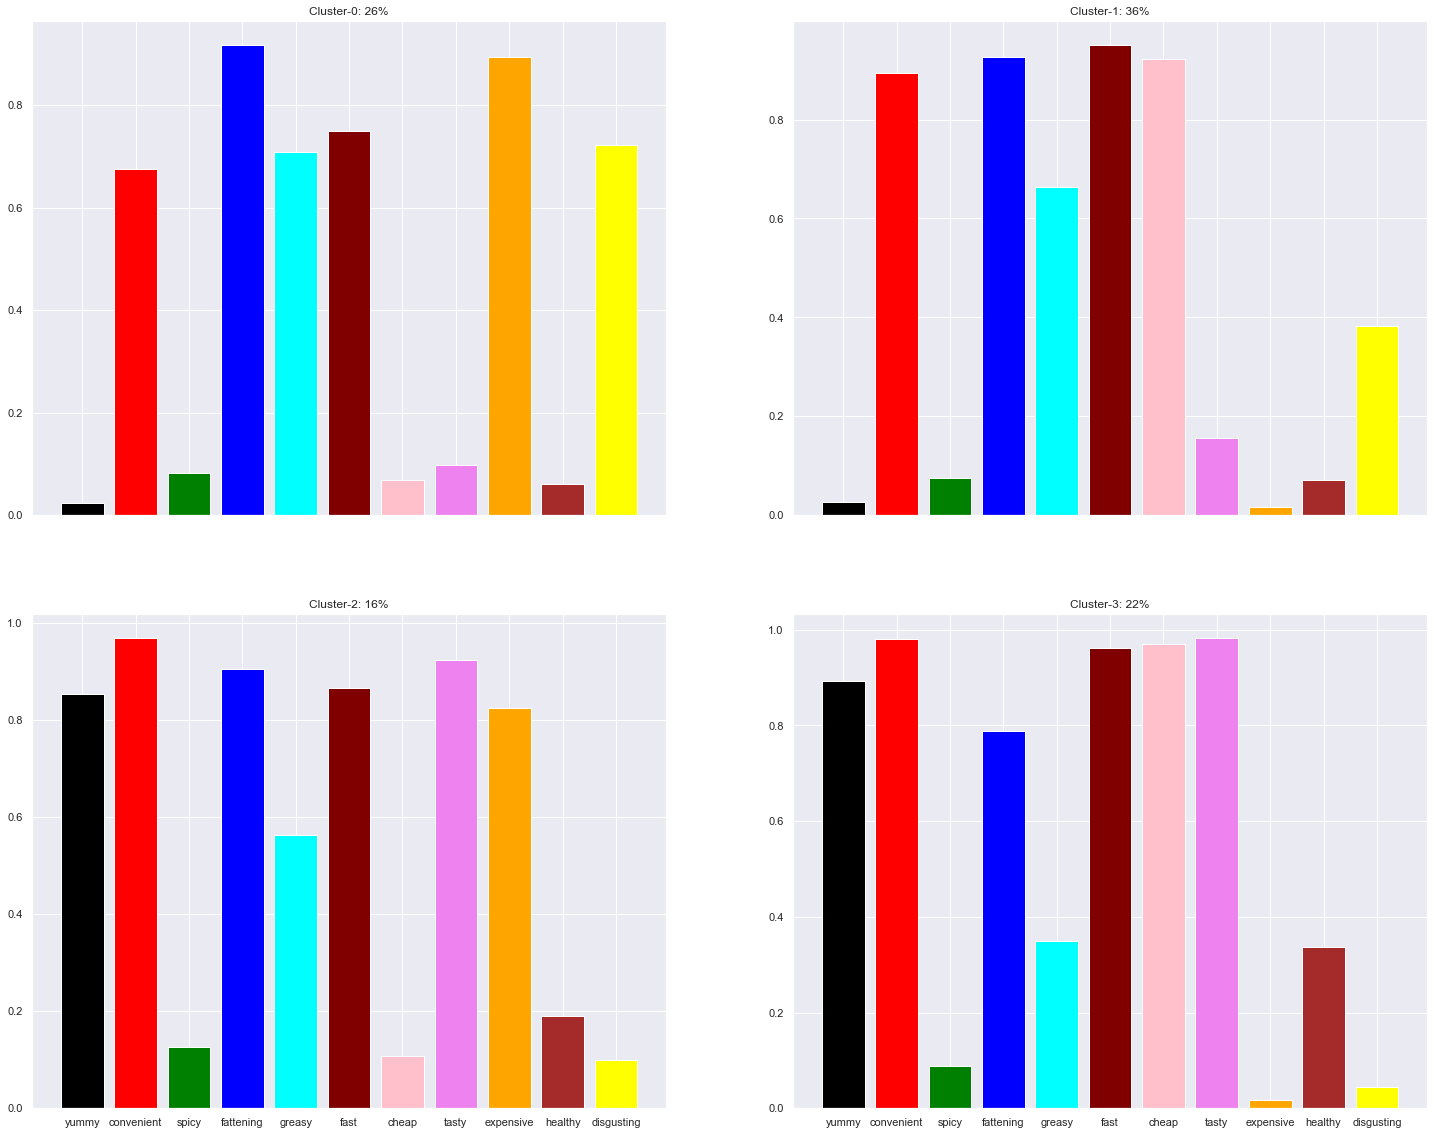

In [51]:
fig, axs = plt.subplots(2, 2, sharex=True,figsize = (25,20))

 
axs[0, 0].bar(cluster_0_pd.columns,cluster_0_pd.mean(),color =['black', 'red', 'green', 'blue', 'cyan','maroon','pink','violet','orange','brown','yellow'])
axs[0, 1].bar(cluster_1_pd.columns,cluster_1_pd.mean(),color =['black', 'red', 'green', 'blue', 'cyan','maroon','pink','violet','orange','brown','yellow'])
axs[1, 0].bar(cluster_2_pd.columns,cluster_2_pd.mean(),color =['black', 'red', 'green', 'blue', 'cyan','maroon','pink','violet','orange','brown','yellow'])
axs[1, 1].bar(cluster_3_pd.columns,cluster_3_pd.mean(),color =['black', 'red', 'green', 'blue', 'cyan','maroon','pink','violet','orange','brown','yellow'])

axs[0, 0].title.set_text("Cluster-0: 26%")
axs[0, 1].title.set_text("Cluster-1: 36%")
axs[1, 0].title.set_text("Cluster-2: 16%")
axs[1, 1].title.set_text("Cluster-3: 22%")
# fig.tight_layout()
plt.show()

In [52]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
data['cluster_num'] = labels #adding to df
#data.replace(to_replace='I love it!+5', value=5)
#data=data.replace(to_replace='I hate it!-5', value=-5)
data['Like']= data['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})
#Like 

#print(data)
data['Like'].value_counts()
#print (Kmeans.labels) #Label assi
#print(cluster_num)
crosstab =pd.crosstab(data['cluster_num'],data['Like'])
#Reordering cols
crosstab = crosstab[['-5','-4','-3','-2','-1','0','+1','+2','+3','+4','+5']]
crosstab


Like,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5
cluster_num,,,,,,,,,,,
0,89,27,31,18,13,37,13,7,8,0,0
1,54,36,34,29,25,53,32,31,12,2,0
2,5,4,6,6,10,37,48,64,74,52,47
3,4,4,2,6,10,42,59,85,135,106,96
